# rsna2018 Notes

This notebook simply provides a few illustrations to go along with the discussion in the README.

## Training Labels

The labels (in this case, the coordinates of the boxes where human radiologists have diagnosed pneumonia) to go along with the x-rays in the training set are in the CSV file displayed below.

The file contains at least one record for every x-ray in the training set, including those without pneumonia, for which the box coords are empty (NaN).  Since YOLO is a regression technique, those rows are useless for training, so we omit them.

We see that the box info is in units of pixels, and we know from other exploration that x,y pertain to the upper left corner. Also, we see that each row in the table has info for just one box; for x-rays with more than one spot of pneumonia, there are multiple rows in the table. (All of this is knowledge that is gained from EDA.)

In [2]:
import numpy as np
import pandas as pd

df_labels = pd.read_csv('rsna/stage_1_train_labels.csv').dropna()
df_labels.head()

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1


## Sample Images

Here are 6 sample x-rays with pneumonia, displayed from the JPG files that were created by extracting the images from the DICOM files provided by RSNA.  The images are overlaid with the boxes from the appropriate rows of the table above.

In [4]:
import os
from glob import glob

df_sample_list = pd.DataFrame({'file':glob('rsna/sample_jpg/*.jpg')})
df_sample_list['pid'] = df_sample_list['file'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
df_sample_list

,file,pid
0,rsna/sample_jpg/a7b7222f-91db-467e-afb7-68f44f...,a7b7222f-91db-467e-afb7-68f44f06c6a2
1,rsna/sample_jpg/db7bce8f-978c-47b1-8b74-7640f7...,db7bce8f-978c-47b1-8b74-7640f7c3625e
2,rsna/sample_jpg/78dba4d7-e138-4d40-b6a5-ac2d8c...,78dba4d7-e138-4d40-b6a5-ac2d8c65dcf5
3,rsna/sample_jpg/7fb3e6fd-596b-41e7-815b-b2be3f...,7fb3e6fd-596b-41e7-815b-b2be3f856184
4,rsna/sample_jpg/bf9b012d-915c-4026-b989-c05312...,bf9b012d-915c-4026-b989-c05312833b38
5,rsna/sample_jpg/8c984367-b094-429a-b8cf-a9aba9...,8c984367-b094-429a-b8cf-a9aba99e8ff9


In [12]:
sample_pid_list = list(df_sample_list['pid'].values)
df_sample_labels = df_labels[df_labels['patientId'].isin(sample_pid_list)]
df_sample_labels

,patientId,x,y,width,height,Target
11692,78dba4d7-e138-4d40-b6a5-ac2d8c65dcf5,504.0,216.0,224.0,261.0,1
12559,7fb3e6fd-596b-41e7-815b-b2be3f856184,101.0,464.0,229.0,179.0,1
12560,7fb3e6fd-596b-41e7-815b-b2be3f856184,575.0,366.0,189.0,339.0,1
14150,8c984367-b094-429a-b8cf-a9aba99e8ff9,168.0,144.0,247.0,586.0,1
17587,a7b7222f-91db-467e-afb7-68f44f06c6a2,632.0,476.0,277.0,294.0,1
21140,bf9b012d-915c-4026-b989-c05312833b38,194.0,287.0,282.0,476.0,1
21141,bf9b012d-915c-4026-b989-c05312833b38,625.0,281.0,301.0,493.0,1
24426,db7bce8f-978c-47b1-8b74-7640f7c3625e,180.0,502.0,176.0,265.0,1


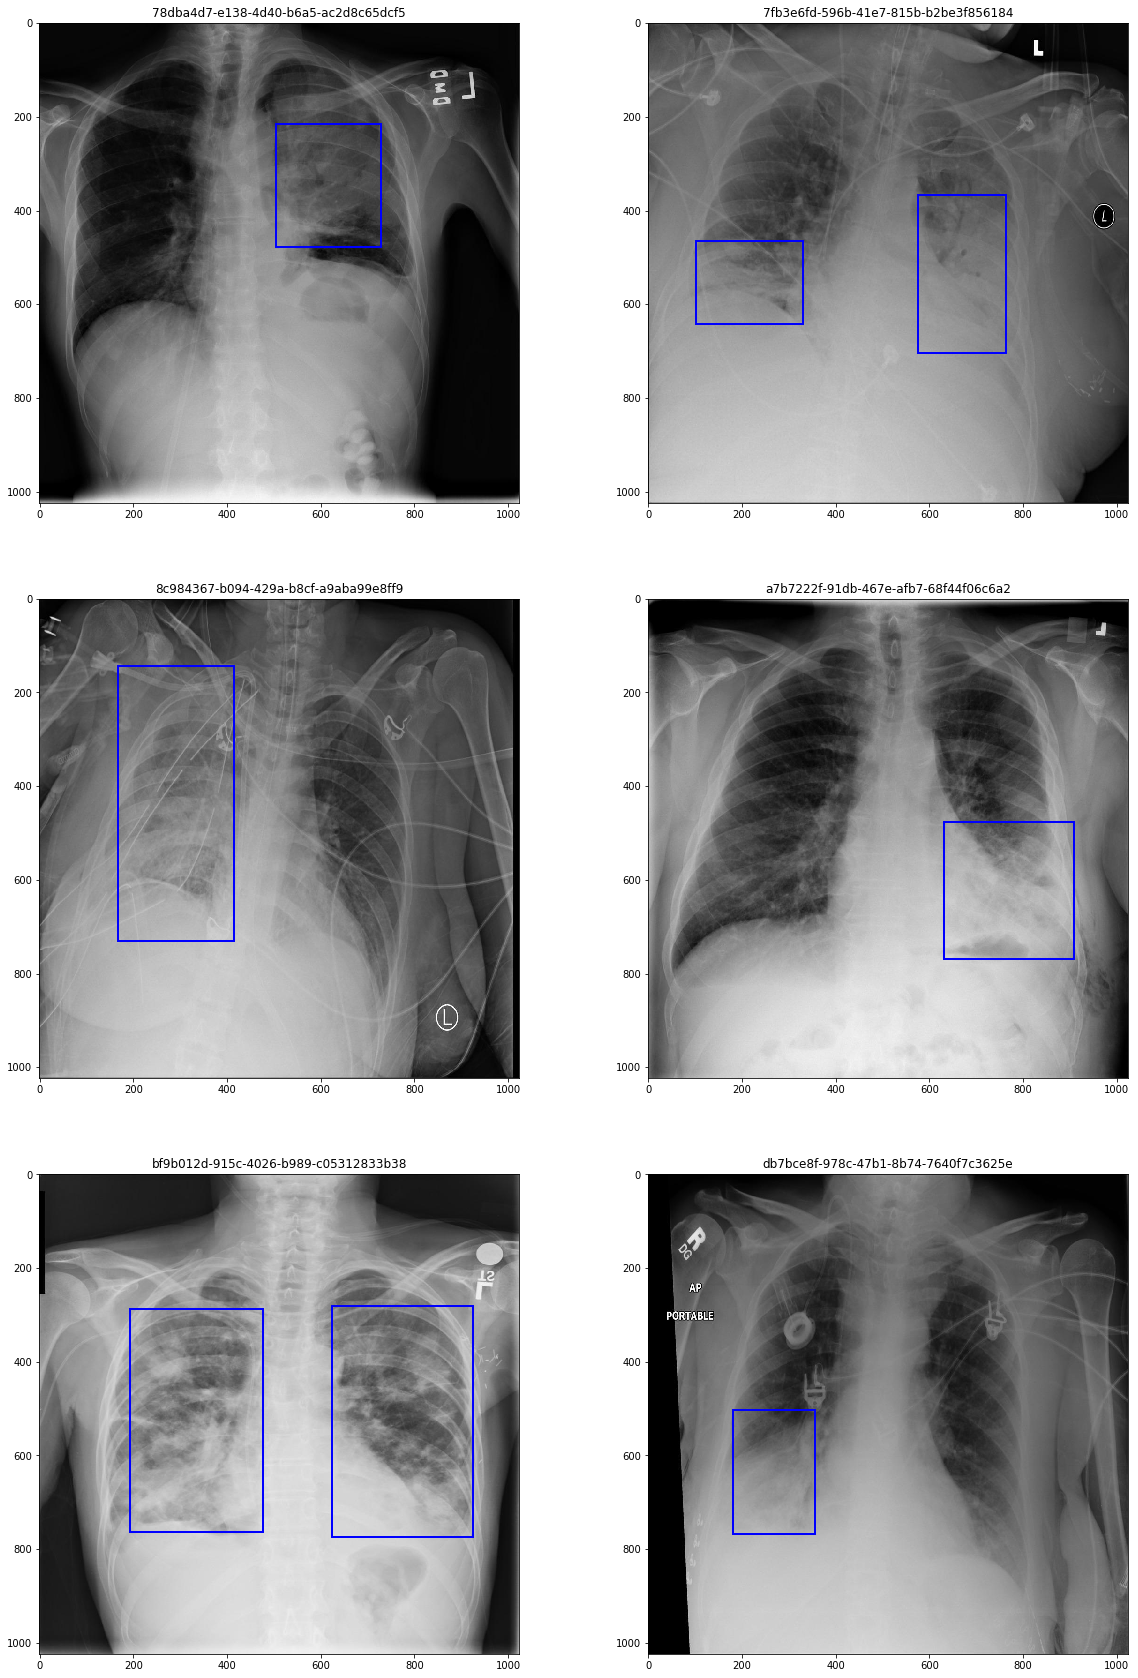

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import pylab
%matplotlib inline

fig, m_axs = plt.subplots(3, 2, figsize = (20, 30))
for c_ax, (pid, rows) in zip(m_axs.flatten(), df_sample_labels.groupby(['patientId'])):
    c_ax.imshow(np.array(Image.open('rsna/sample_jpg/{}.jpg'.format(pid))))
    c_ax.set_title(pid)
    for _, row in rows.iterrows():
        c_ax.add_patch(Rectangle((row['x'],row['y']), row['width'], row['height'], 
                    linewidth=2, edgecolor='b', facecolor='none'))

## Predictions for Sample Images

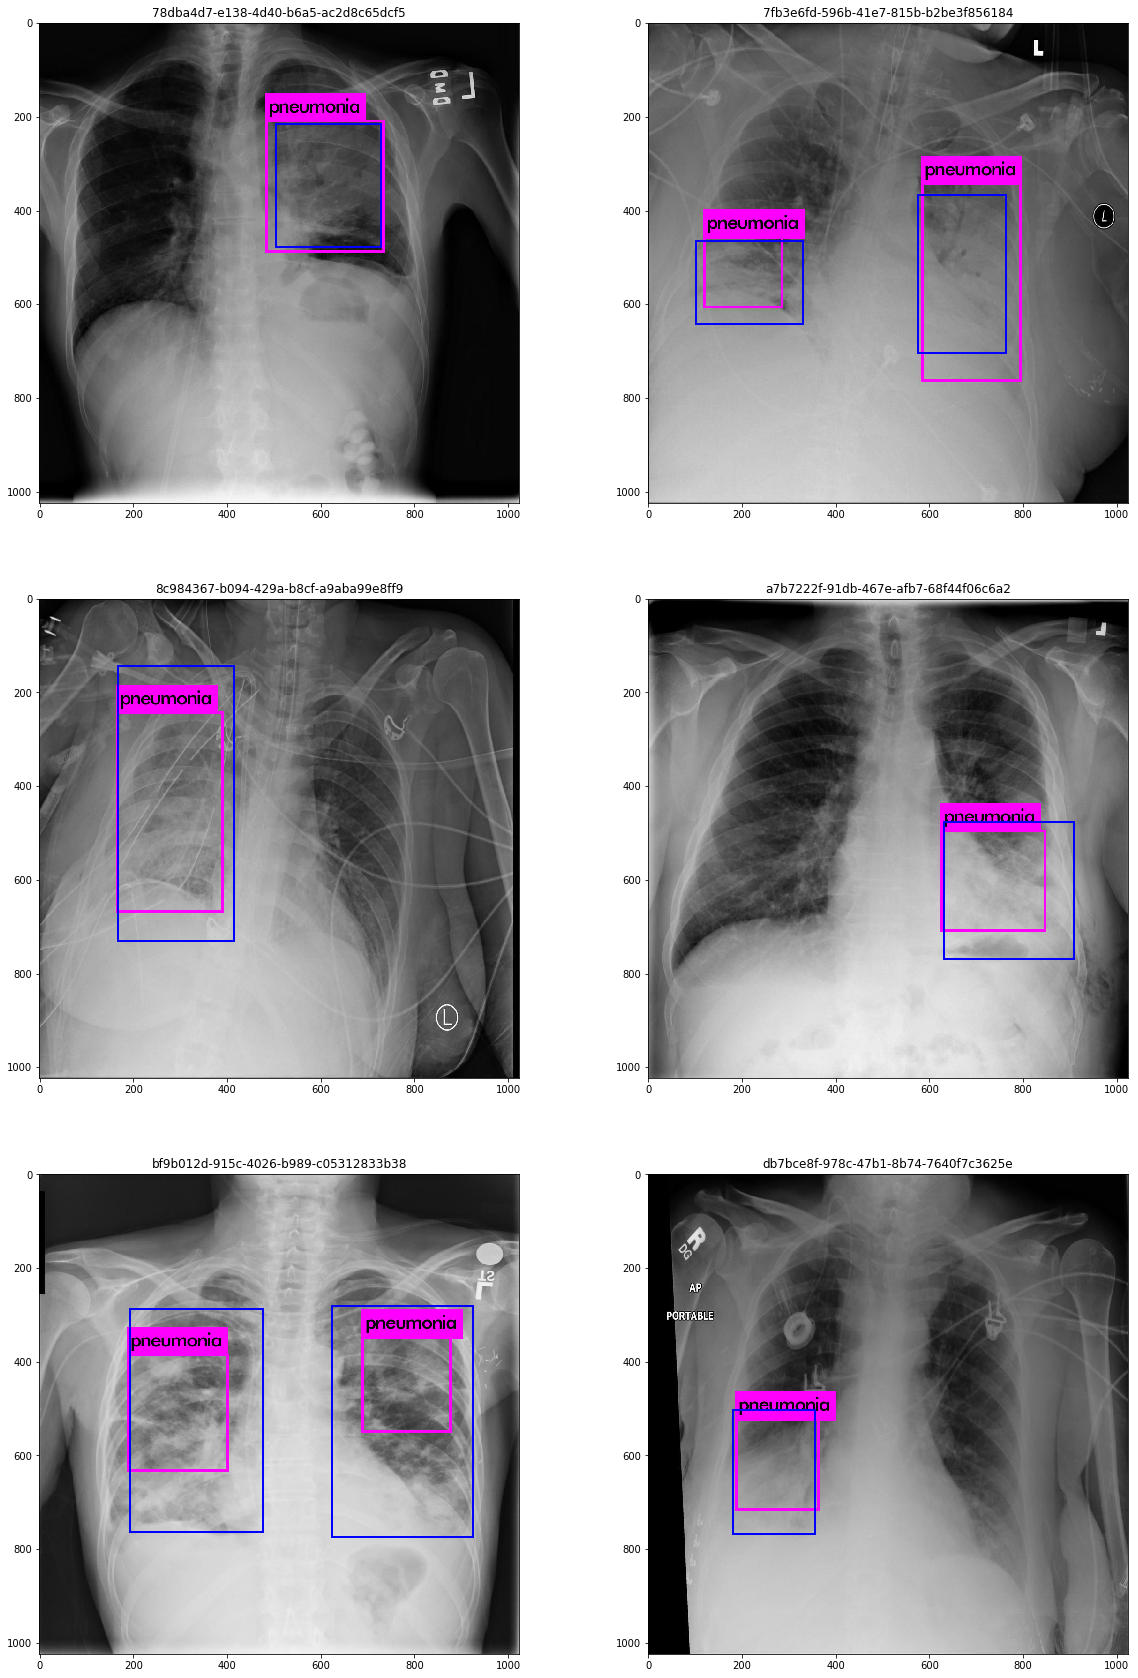

In [21]:
fig, m_axs = plt.subplots(3, 2, figsize = (20, 30))
for c_ax, (pid, rows) in zip(m_axs.flatten(), df_sample_labels.groupby(['patientId'])):
    c_ax.imshow(np.array(Image.open('rsna/sample_pred/{}-pred.jpg'.format(pid))))
    c_ax.set_title(pid)
    for _, row in rows.iterrows():
        c_ax.add_patch(Rectangle((row['x'],row['y']), row['width'], row['height'], 
                    linewidth=2, edgecolor='b', facecolor='none'))